<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import time

%matplotlib inline

### 1. Generate 20 real number for the variable X from the uniform distribution U[0,1]

In [490]:
uniform_dist_numbers = np.random.uniform(size=20)
print(f'20 Real numbers between [0,1] Uniformly distributed: \n{uniform_dist_numbers}')

20 Real numbers between [0,1] Uniformly distributed: 
[0.19161724 0.76208423 0.92706982 0.91193227 0.10186565 0.56387514
 0.12806626 0.62005124 0.27632755 0.35252213 0.80109109 0.2476806
 0.73400006 0.29434335 0.06512538 0.95307374 0.65011455 0.48821452
 0.14606766 0.37150718]


### 2. Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the  relation $Y_{i}$ = sin(2 π $x_{i}$ ) + $ϵ_{i}$ where  $ϵ_{i}$  ~ N(0,0.25)

In [491]:
# create an empty set Yi
Yi=[]

# for every input as x1, x2, ... x20 from uniform_dist_numbers
# let the output be y1, y2, ... y20
for x_val in uniform_dist_numbers:
    temp_Yi = math.sin( 2 * math.pi * x_val) + np.random.uniform(0, 0.25)
    Yi.append(temp_Yi)

# create a new dataset with x and y together
T_data = pd.DataFrame(data=(uniform_dist_numbers, Yi), index=['x', 'y']).T
T_data

,x,y
0,0.191617,1.007690
1,0.762084,-0.856386
2,0.927070,-0.243340
3,0.911932,-0.340529
4,0.101866,0.796661
5,0.563875,-0.333091
6,0.128066,0.882954
7,0.620051,-0.633028
8,0.276328,1.221891
9,0.352522,0.846453


### 3. In the similar way construct a testing set of size 50 i.e, Test =  { (x’1, y’1), (x’2, y’2), ... , (x’50, y’50)}

In [492]:
test_uniform_dist = np.random.uniform(size=50)

test_Yi=[]

# for every input as x1, x2, ... x20 from uniform_dist_numbers
# let the output be y1, y2, ... y20
for x_test in test_uniform_dist:
    temp_Yi = math.sin( 2 * math.pi * x_test) + np.random.uniform(0, 0.25)
    test_Yi.append(temp_Yi)

# create a new dataset with x and y together
Test_data = pd.DataFrame(data=(test_uniform_dist, test_Yi), index=['x', 'y']).T
Test_data

,x,y
0,0.001684,0.154653
1,0.618603,-0.523367
2,0.889654,-0.563719
3,0.236634,1.178743
4,0.384990,0.696939
5,0.922853,-0.220908
6,0.008864,0.061743
7,0.859587,-0.553217
8,0.819682,-0.826959
9,0.607379,-0.622435


Lets see how the testing and training plot looks like

Text(0.5, 1.0, 'Training Data')

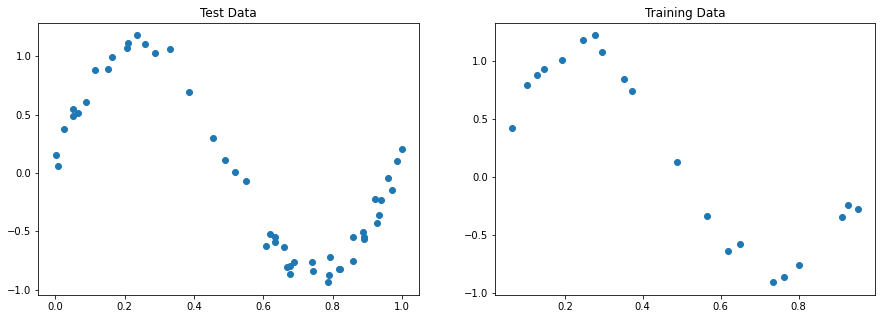

In [493]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(Test_data['x'], Test_data['y'])
axes[0].set_title('Test Data')
axes[1].scatter(T_data['x'], T_data['y'])
axes[1].set_title('Training Data')

### 4. Estimate the Least Square polynomial regression model of order M = 1, 2, 3, 9 using the training set T.

β = $($$X^{T}$$.X)^{-1}$ . $X^{T}$.Y

In [518]:
# To get the least-squares fit of a polynomial to data, use the polynomial.polyfit() in Numpy

# M=1, p(x) = β0 + β1x^1
# M=2, p(x) = β0 + β1x^1 + β2x^2
# M=3, p(x) = β0 + β1x^1 + β2x^2 + β3x^3
# M=9, p(x) = β0 + β1x^1 + β2x^2 + β3x^3 + β4x^4 + β5x^5 + β6x^6 + β7x^7 + β8x^8 + β9x^9

# Function to find Least Square Polynomial Regression for given degree
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)
  
LSP_ord_1 = np.array(LSPR(T_data['x'], T_data['y'], 1))
LSP_ord_2 = np.array(LSPR(T_data['x'], T_data['y'], 2))
LSP_ord_3 = np.array(LSPR(T_data['x'], T_data['y'], 3))
LSP_ord_9 = np.array(LSPR(T_data['x'], T_data['y'], 9))

# We can use in-built libraries to check if the coefficients that we calculated are correct.
# LSP_ord_1 = np.polyfit(T_data['x'], T_data['y'], 1)
# LSP_ord_2 = np.polyfit(T_data['x'], T_data['y'], 2)
# LSP_ord_3 = np.polyfit(T_data['x'], T_data['y'], 3)
# LSP_ord_9 = np.polyfit(T_data['x'], T_data['y'], 9)

### 5. List the value of coefficients of estimated polynomial regression models for
each case.

In [495]:
print(f'Coefficients of polynomial regression model 1: {LSP_ord_1[0]}\n')
print(f'Coefficients of polynomial regression model 2: {LSP_ord_2[0]}\n')
print(f'Coefficients of polynomial regression model 3: {LSP_ord_3[0]}\n')
print(f'Coefficients of polynomial regression model 9: {LSP_ord_9[0]}\n')

Coefficients of polynomial regression model 1: [ 1.23285403 -2.12030414]

Coefficients of polynomial regression model 2: [ 1.39690496 -3.0886118   0.95269101]

Coefficients of polynomial regression model 3: [ -0.2398208   13.23642735 -37.58567305  25.04416563]

Coefficients of polynomial regression model 9: [-3.11155350e+00  1.16880056e+02 -1.47226045e+03  1.01535496e+04
 -4.09483495e+04  1.00204350e+05 -1.50881337e+05  1.36564727e+05
 -6.80980691e+04  1.43635991e+04]



### For last few questions, we need a side-by-side comparision of graphs. So, we will solve these questions together.

### 6. Obtain the prediction on testing set and compute the RMSE for polynomial regression models for order M = 1, 2, 3 and 9.

### 7. Plot the estimate obtained by polynomial regression models for order M = 1, 2, 3 and 9 for training set along  with y1, y2, ... , y50. Also plot our actual mean estimate E(Y/X) =  sin(2 π xi ).

### 8. Plot the estimate obtained by polynomial regression models for order M = 1, 2, 3 and 9 for testing set along  with y’1, y’2, ... , y’50. Also plot the sin(2 π x’i ).

#### ORDER M = 1

##### 6.1 Prediction on testing set for order M = 1

In [496]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
y_predicted_m1 = []

for val in X:
  y_val = 0
  for deg in range(0, 2):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

# plot to compare trained vs actual values
# plt.scatter(X, y_predicted_m1, color='red')
# plt.scatter(X, Test_data['y'], color='black')

print(np.array(y_predicted_m1))

[ 1.22928292 -0.07877288 -0.65348242  0.73111777  0.41655874 -0.72387577
  1.21406024 -0.5897312  -0.50512062 -0.05497487 -0.7621922   0.79428221
 -0.22702145  1.09541276 -0.58750116 -0.33596936 -0.5073848  -0.2029311
 -0.43728204  1.17683364 -0.88540969  0.68288891  0.62392014  0.13239822
 -0.79975628  0.78996139 -0.44958328 -0.18160948 -0.73490479 -0.11069347
  0.90976199 -0.16690102 -0.82619227  0.19445115  0.52869351 -0.64732435
 -0.85856808  0.88532934  1.12514396  1.12092759  0.98873361 -0.11048925
 -0.2010764   0.06461644 -0.65750201 -0.34274326  0.26598047 -0.74963692
  1.04430078 -0.44210913]


##### 6.2 To get the Root Mean Square Error for order M = 1

In [497]:
rmse_1 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m1):
  rmse_1 += (test_y - predicted_y)**2

rmse_1 /= len(Test_data['y'])
rmse_1 = math.sqrt(rmse_1)
print(rmse_1)


0.5160257351882337


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 1 for training set along with y1, y2, ... , y50

##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 1 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

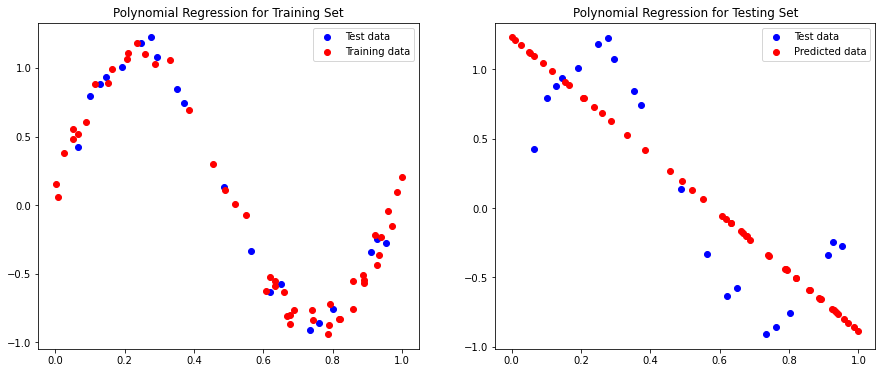

In [498]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m1, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Set')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

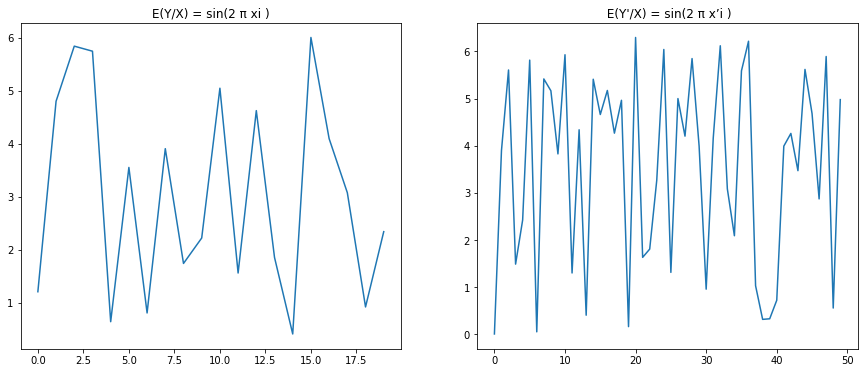

In [499]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 2

##### 6.1 Prediction on testing set for order M = 2

In [500]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
y_predicted_m2 = []

for val in X:
  y_val = 0
  for deg in range(0, 3):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

#plots to compare trained vs predicted values
# plt.scatter(X, y_predicted_m2, color='red')
# plt.scatter(X, Test_data['y'], color='black')

print(np.array(y_predicted_m2))

[ 1.39170569 -0.14915398 -0.59685056  0.71938069  0.34902626 -0.64206359
  1.36960321 -0.55409147 -0.4946815  -0.12759709 -0.6657912   0.79880496
 -0.27803662  1.20069959 -0.55256456 -0.3668145  -0.49631082 -0.25772706
 -0.44485654  1.31596603 -0.7378763   0.65987518  0.58845819  0.05051545
 -0.68844889  0.79331799 -0.45403612 -0.23954651 -0.64895713 -0.17769161
  0.94838334 -0.22689258 -0.70403586  0.11278143  0.47624096 -0.59279539
 -0.72272152  0.91626486  1.24246398  1.23651831  1.05392766 -0.17751041
 -0.25615324 -0.01563413 -0.59948885 -0.3721682   0.18658116 -0.65808483
  1.12977654 -0.44846632]


##### 6.2 To get the Root Mean Square Error for order M = 2

In [501]:
rmse_2 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m2):
  rmse_2 += (test_y - predicted_y)**2

rmse_2 /= len(Test_data['y'])
rmse_2 = math.sqrt(rmse_2)
print(rmse_2)

0.5144726359807302


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 2 for training set along with y1, y2, ... , y50.
##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 2 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, "Polynomial Regression for Testing Data along y'")

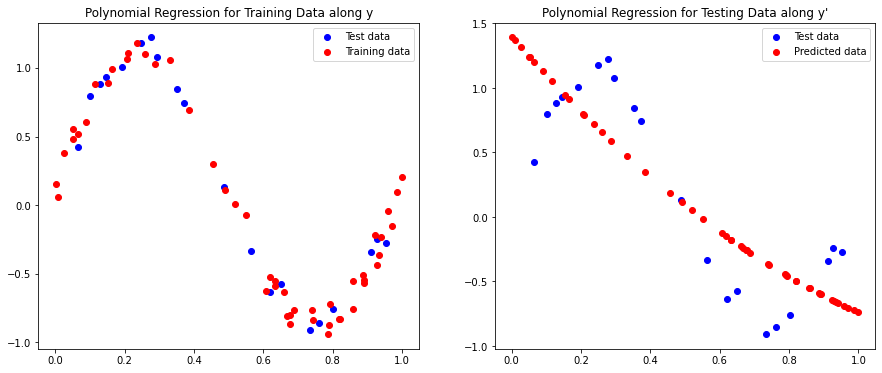

In [502]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m2, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

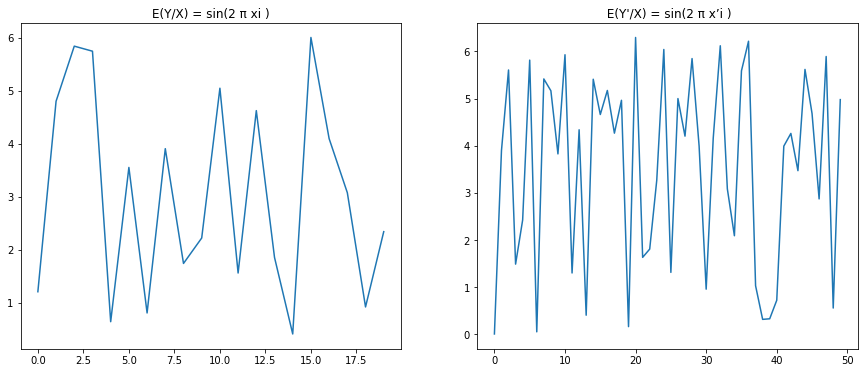

In [503]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 3

##### 6.1 Prediction on testing set for order M = 3

In [504]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
y_predicted_m3 = []

for val in X:
  y_val = 0
  for deg in range(0,4):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)


# plot to compare trained vs actual values
# plt.scatter(X, y_predicted_m3, color='red')
# plt.scatter(X, Test_data['y'], color='black')

print(np.array(y_predicted_m1))


[ 1.22928292 -0.07877288 -0.65348242  0.73111777  0.41655874 -0.72387577
  1.21406024 -0.5897312  -0.50512062 -0.05497487 -0.7621922   0.79428221
 -0.22702145  1.09541276 -0.58750116 -0.33596936 -0.5073848  -0.2029311
 -0.43728204  1.17683364 -0.88540969  0.68288891  0.62392014  0.13239822
 -0.79975628  0.78996139 -0.44958328 -0.18160948 -0.73490479 -0.11069347
  0.90976199 -0.16690102 -0.82619227  0.19445115  0.52869351 -0.64732435
 -0.85856808  0.88532934  1.12514396  1.12092759  0.98873361 -0.11048925
 -0.2010764   0.06461644 -0.65750201 -0.34274326  0.26598047 -0.74963692
  1.04430078 -0.44210913]


##### 6.2 To get the Root Mean Square Error for order M = 3

In [505]:
rmse_3 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m3):
  rmse_3 += (test_y - predicted_y)**2

rmse_3 /= len(Test_data['y'])
rmse_3 = math.sqrt(rmse_3)
print(rmse_3)

0.12061331066506488


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 3 for training set along with y1, y2, ... , y50.
##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 3 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, "Polynomial Regression for Testing Data along y'")

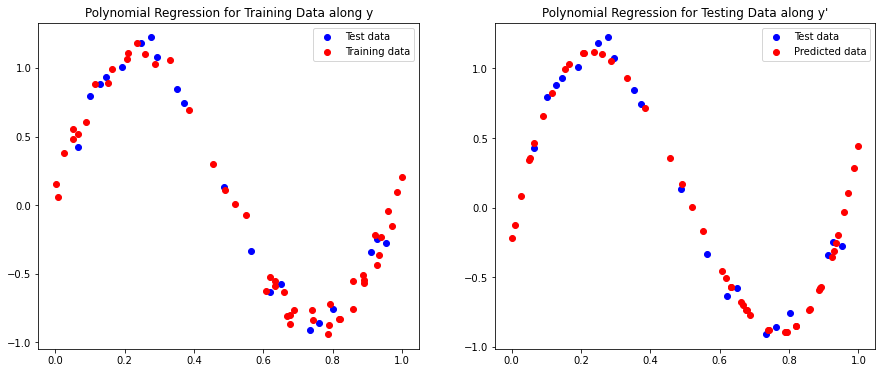

In [506]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m3, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

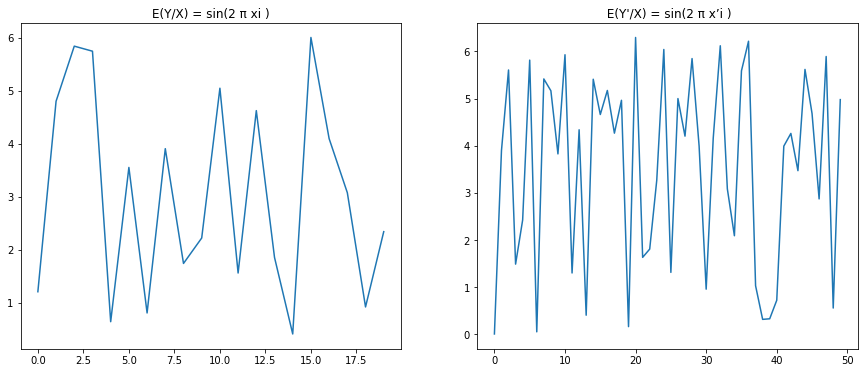

In [507]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 9

##### 6.1 Prediction on testing set for order M = 9

In [508]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
y_predicted_m9 = []

for val in X:
  y_val = 0
  for deg in range(0, 10):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

#plots to compare trained vs predicted values
# plt.scatter(X, y_predicted_m9, color='red')
# plt.scatter(X, Test_data['y'], color='black')

print(np.array(y_predicted_m2))

[ 1.39170569 -0.14915398 -0.59685056  0.71938069  0.34902626 -0.64206359
  1.36960321 -0.55409147 -0.4946815  -0.12759709 -0.6657912   0.79880496
 -0.27803662  1.20069959 -0.55256456 -0.3668145  -0.49631082 -0.25772706
 -0.44485654  1.31596603 -0.7378763   0.65987518  0.58845819  0.05051545
 -0.68844889  0.79331799 -0.45403612 -0.23954651 -0.64895713 -0.17769161
  0.94838334 -0.22689258 -0.70403586  0.11278143  0.47624096 -0.59279539
 -0.72272152  0.91626486  1.24246398  1.23651831  1.05392766 -0.17751041
 -0.25615324 -0.01563413 -0.59948885 -0.3721682   0.18658116 -0.65808483
  1.12977654 -0.44846632]


##### 6.2 To get the Root Mean Square Error for order M = 9

In [509]:
rmse_9 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m9):
  rmse_9 += (test_y - predicted_y)**2

rmse_9 /= len(Test_data['y'])
rmse_9 = math.sqrt(rmse_9)
print(rmse_9)

0.5822288870198693


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 9 for training set along with y1, y2, ... , y50.

Text(0.5, 1.0, "Polynomial Regression for Predicted Data along y'")

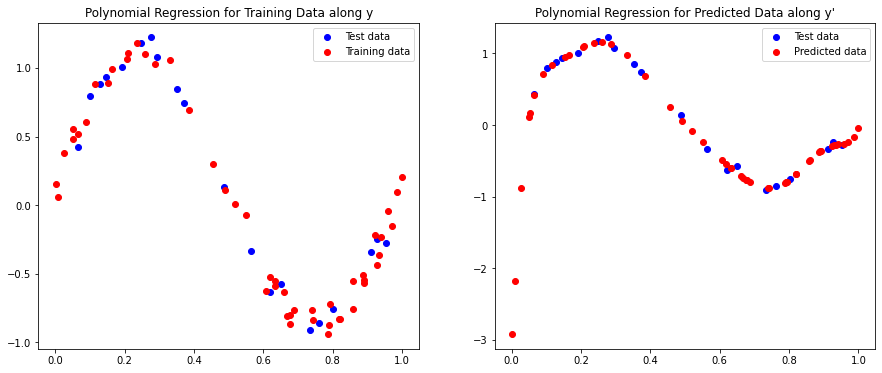

In [510]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m9, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Predicted Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

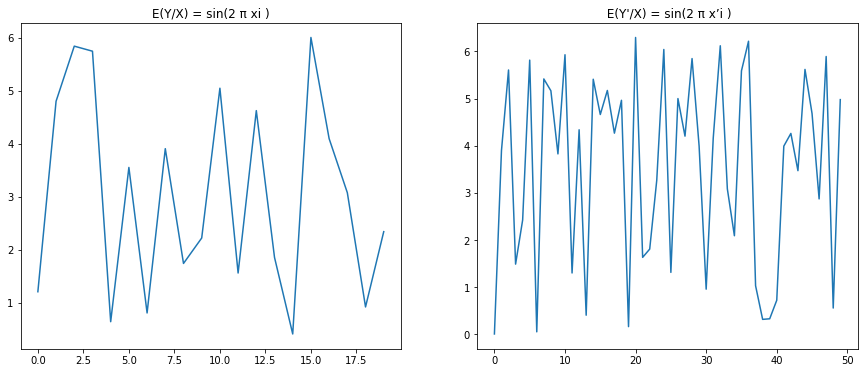

In [511]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### While plotting the graphs against train(y1, y2... yn) and predicted(y'1, y'2... y'n) values of y, we can observe the following:

1. Order 1 means Simple linear regression. The line for predicted values obtained is a straight line. Since our plot is a function of sine, the simple linear regression is not a good fit because we cannot fit the data correctly using nothing but just a straight line.

2. When we take order M = 2, we notice that the predicted data is starting to form curves. Still not better than previous case, but its progress.

3. The fit improves when we increase the number of degrees. We will “usually” get a slightly better fit as we increase the order BUT a less general (and more complicated) expression. This means that when using our regression on another set of data, we will get a slightly worse fit than a more general expression would have given.

4. If we look closely the graph when order is 3, we notice that the model is starting to fit the training data with a better accuracy than previous two cases.

5. When we run the function while passing high degrees like 9, then the model tries to OVERFIT the data; means slowly the prediction line will leave its original essence and try to rely on training data points and as there is some change in the training path the line tries to catch the point. This is a problem with a High degree of polynomial. Here, we can also notice the extremum values that the model predicted is to the very far extent.

Lets compare the execution time and the accuracy of the model for all the 4 orders.

In [515]:
order_M = [1, 2, 3, 9]
rmse = [rmse_1, rmse_2, rmse_3, rmse_9]
rmse_per_change = [1, 0, 0, 0]

for itr in range(0, 3):
  rmse_per_change[itr+1] = ((rmse[itr+1] - rmse[itr]) / rmse[itr]) * 100

statistical_plot = pd.DataFrame([order_M, rmse, rmse_per_change], index=['Order M', 'RMSE', '%Inc or Dec in RMSE']).T
statistical_plot

,Order M,RMSE,%Inc or Dec in RMSE
0,1.0,0.516026,1.000000
1,2.0,0.514473,-0.300973
2,3.0,0.120613,-76.555933
3,9.0,0.582229,382.723577


Text(0, 0.5, '% inc/ dec in RMSE')

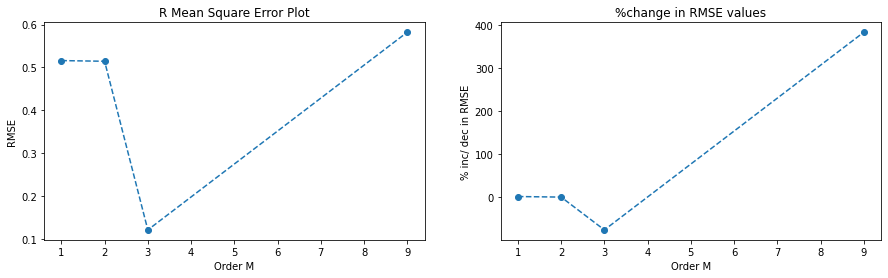

In [516]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].plot(statistical_plot['Order M'], statistical_plot['RMSE'], '--o')
axes[0].set_title('R Mean Square Error Plot')
axes[0].set_xlabel('Order M')
axes[0].set_ylabel('RMSE')

axes[1].plot(statistical_plot['Order M'], statistical_plot['%Inc or Dec in RMSE'], '--o')
axes[1].set_xticks(np.arange(1, 10, 1))
axes[1].set_title('%change in RMSE values')
axes[1].set_xlabel('Order M')
axes[1].set_ylabel('% inc/ dec in RMSE')

From the graph we can conclude following observations:

1. On checking the RMSE graph(Right), we notice that the %-change from order 2 -> 3(76.55%) is not that much huge when compared with order 3 -> 9(382.72%). We found a unique pattern where we expected the RMSE error value to decrease with increase in polynomial order, but here it is quite the opposite.